In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df = pd.read_excel(r'Dataset.xlsx')

In [3]:
df = pd.read_excel(r'Dataset.xlsx',header=10, names=['Date','Price'])

In [4]:
df

,Date,Price
0,1968-04-01,38.00
1,1968-04-02,37.60
2,1968-04-03,37.70
3,1968-04-04,36.70
4,1968-04-05,37.20
...,...,...
13903,2021-07-15,1832.00
13904,2021-07-16,1822.00
13905,2021-07-19,1803.25
13906,2021-07-20,1815.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13908 non-null  datetime64[ns]
 1   Price   13477 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 217.4 KB


In [6]:
df=df.interpolate()

In [7]:
nan_index=df[df['Price'].isnull()].index.tolist()
nan_index

[]

In [8]:
df.iloc[10]

Date     1968-04-15 00:00:00
Price                38.0833
Name: 10, dtype: object

In [9]:
df["month"] = df.Date.dt.strftime("%b")

In [10]:
df["year"] = df.Date.dt.strftime("%Y")

In [11]:
#df= df.set_index(['Date'])

In [12]:
df

,Date,Price,month,year
0,1968-04-01,38.00,Apr,1968
1,1968-04-02,37.60,Apr,1968
2,1968-04-03,37.70,Apr,1968
3,1968-04-04,36.70,Apr,1968
4,1968-04-05,37.20,Apr,1968
...,...,...,...,...
13903,2021-07-15,1832.00,Jul,2021
13904,2021-07-16,1822.00,Jul,2021
13905,2021-07-19,1803.25,Jul,2021
13906,2021-07-20,1815.30,Jul,2021


In [13]:
df.isnull().sum()

Date     0
Price    0
month    0
year     0
dtype: int64

In [14]:
#df=df.dropna(how='any')

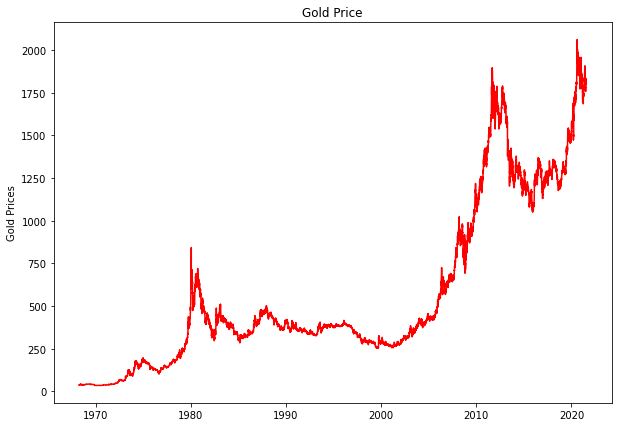

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(df.Date,df.Price,color='r')
plt.ylabel("Gold Prices")
plt.title("Gold Price")
plt.show()

<AxesSubplot:xlabel='month'>

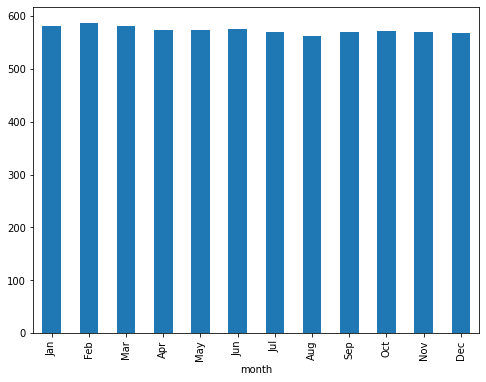

In [16]:
plt.figure(figsize=(8,6))
df.groupby('month')['Price'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')

<AxesSubplot:xlabel='month', ylabel='Price'>

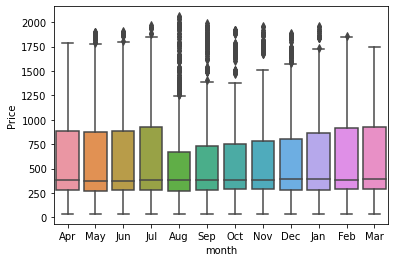

In [17]:
#Box plots
sns.boxplot(x="month",y="Price",data=df)

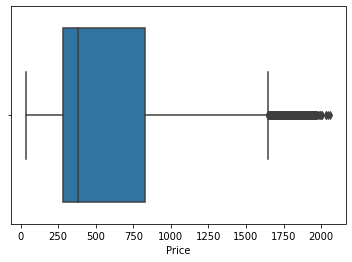

In [18]:
#Box plots
sns.boxplot(x='Price',data=df)
plt.xlabel("Price")
#plt.ylabel("FFT amplitude")
plt.savefig('plot.png')

<AxesSubplot:xlabel='year', ylabel='Price'>

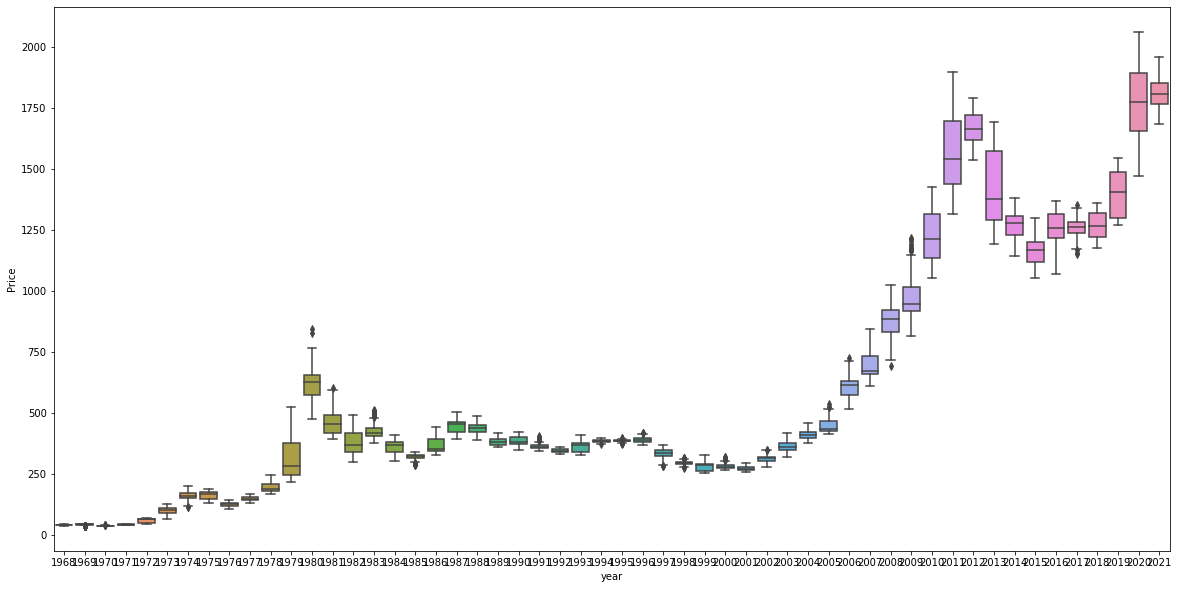

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(x="year",y="Price",data=df)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

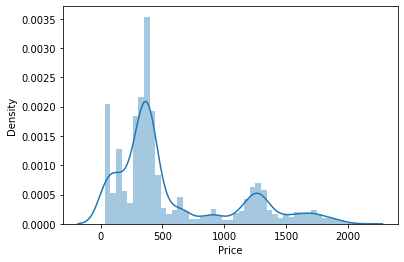

In [20]:
sns.distplot(df.Price)

In [21]:
df[df['Date']>'2000-01-01']

,Date,Price,month,year
8285,2000-01-03,284.983333,Jan,2000
8286,2000-01-04,282.050000,Jan,2000
8287,2000-01-05,282.100000,Jan,2000
8288,2000-01-06,280.350000,Jan,2000
8289,2000-01-07,282.000000,Jan,2000
...,...,...,...,...
13903,2021-07-15,1832.000000,Jul,2021
13904,2021-07-16,1822.000000,Jul,2021
13905,2021-07-19,1803.250000,Jul,2021
13906,2021-07-20,1815.300000,Jul,2021


In [22]:
df_x=df.iloc[8285:,]

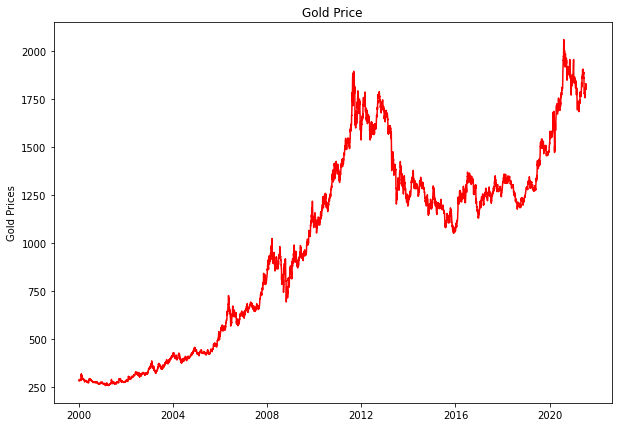

In [23]:
plt.figure(figsize=(10, 7))
plt.plot(df_x.Date,df_x.Price,color='r')
plt.ylabel("Gold Prices")
plt.title("Gold Price")
plt.show()

<AxesSubplot:xlabel='year', ylabel='Price'>

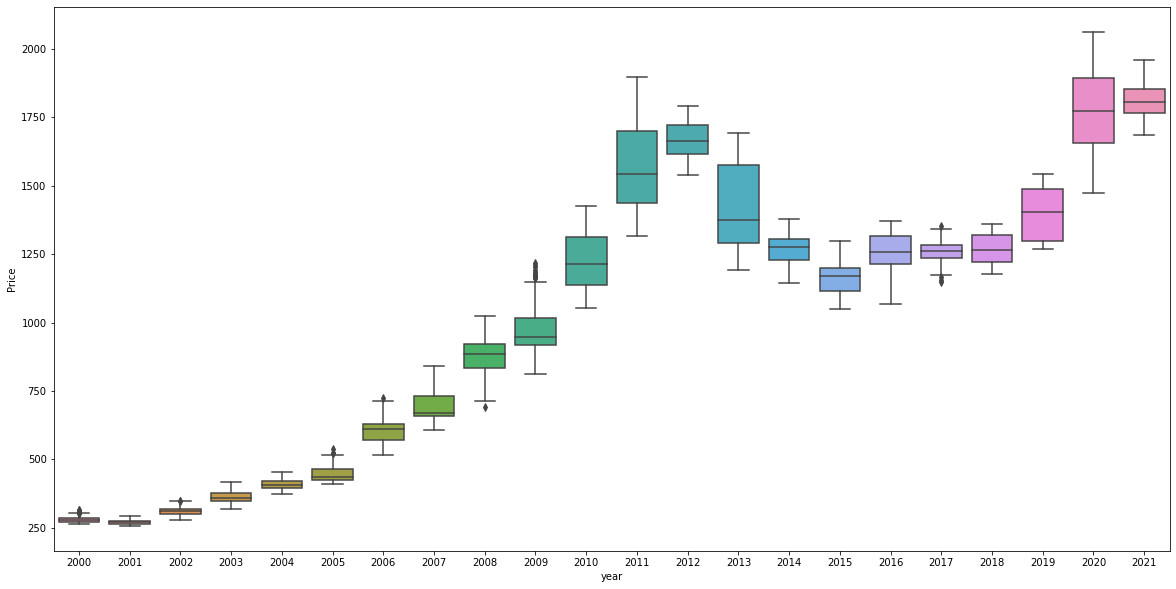

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x="year",y="Price",data=df_x)

In [25]:
df_x

,Date,Price,month,year
8285,2000-01-03,284.983333,Jan,2000
8286,2000-01-04,282.050000,Jan,2000
8287,2000-01-05,282.100000,Jan,2000
8288,2000-01-06,280.350000,Jan,2000
8289,2000-01-07,282.000000,Jan,2000
...,...,...,...,...
13903,2021-07-15,1832.000000,Jul,2021
13904,2021-07-16,1822.000000,Jul,2021
13905,2021-07-19,1803.250000,Jul,2021
13906,2021-07-20,1815.300000,Jul,2021


In [26]:
df_x = df_x.set_index(['Date'])

In [27]:
df_x

,Price,month,year
Date,,,
2000-01-03,284.983333,Jan,2000
2000-01-04,282.050000,Jan,2000
2000-01-05,282.100000,Jan,2000
2000-01-06,280.350000,Jan,2000
2000-01-07,282.000000,Jan,2000
...,...,...,...
2021-07-15,1832.000000,Jul,2021
2021-07-16,1822.000000,Jul,2021
2021-07-19,1803.250000,Jul,2021


In [28]:
# Define explanatory variables
df_x['S_3'] = df_x['Price'].rolling(window=3).mean()
df_x['S_9'] = df_x['Price'].rolling(window=9).mean()
df_x['next_day_price'] = df_x['Price'].shift(-1)

df_x= df_x.dropna()
X = df_x[['S_3', 'S_9']]

# Define dependent variable
y = df_x['next_day_price']

In [29]:
df_x.isnull().sum()

Price             0
month             0
year              0
S_3               0
S_9               0
next_day_price    0
dtype: int64

In [30]:
# Split the data into train and test dataset
t = .8
t = int(t*len(df_x))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [31]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.20 * 9 Days Moving Average (x2) + 0.82 (constant)


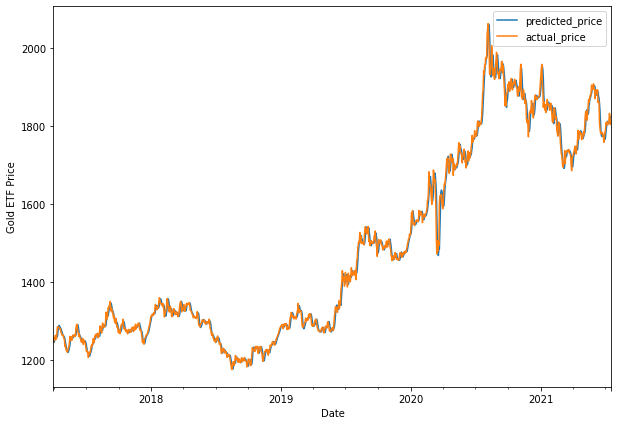

In [32]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

In [33]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

99.51

In [34]:
from sklearn import  metrics
metrics.r2_score(y_test,predicted_price)

0.9950840322352168

In [35]:
linear_model=pd.concat([y_test,predicted_price],axis=1)

In [36]:
linear_model

,next_day_price,price
Date,,
2017-03-31,1246.25,1248.808902
2017-04-03,1258.65,1245.826647
2017-04-04,1252.50,1248.648727
2017-04-05,1253.75,1252.870884
2017-04-06,1264.30,1255.655719
...,...,...
2021-07-14,1832.00,1808.758540
2021-07-15,1822.00,1819.304052
2021-07-16,1803.25,1824.273910


In [37]:
df_x.columns

Index(['Price', 'month', 'year', 'S_3', 'S_9', 'next_day_price'], dtype='object')

In [38]:
df_x.loc['20170331':'20170430']

,Price,month,year,S_3,S_9,next_day_price
Date,,,,,,
2017-03-31,1241.700000,Mar,2017,1248.500000,1247.344444,1246.250000
2017-04-03,1246.250000,Apr,2017,1246.283333,1248.922222,1258.650000
2017-04-04,1258.650000,Apr,2017,1248.866667,1250.316667,1252.500000
2017-04-05,1252.500000,Apr,2017,1252.466667,1250.827778,1253.750000
2017-04-06,1253.750000,Apr,2017,1254.966667,1251.911111,1264.300000
2017-04-07,1264.300000,Apr,2017,1256.850000,1252.733333,1253.600000
2017-04-10,1253.600000,Apr,2017,1257.216667,1252.727778,1255.700000
2017-04-11,1255.700000,Apr,2017,1257.866667,1253.038889,1272.300000
2017-04-12,1272.300000,Apr,2017,1260.533333,1255.416667,1286.100000


In [39]:
#df_x = df_x.set_index(['Date'])
df_stationary=df.copy()
df_stationary=df_stationary.drop(['month','year'],axis=1)
df_stationary = df_stationary.set_index(['Date'])

In [40]:
df_stationary

,Price
Date,
1968-04-01,38.00
1968-04-02,37.60
1968-04-03,37.70
1968-04-04,36.70
1968-04-05,37.20
...,...
2021-07-15,1832.00
2021-07-16,1822.00
2021-07-19,1803.25


In [41]:
#to check stationary
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=365).mean()
    movingSTD = timeseries.rolling(window=365).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

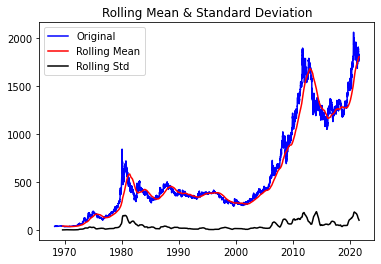

Results of Dickey Fuller Test:
Test Statistic                     0.602575
p-value                            0.987679
#Lags Used                        41.000000
Number of Observations Used    13866.000000
Critical Value (1%)               -3.430822
Critical Value (5%)               -2.861748
Critical Value (10%)              -2.566881
dtype: float64


In [42]:
test_stationarity(df_stationary)

In [43]:
#trying differnt trasform

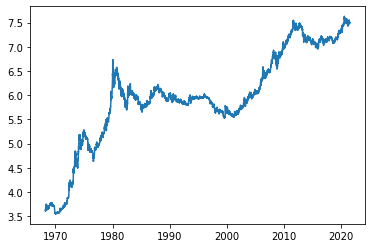

In [44]:
#Estimating trend
df_logScale = np.log(df_stationary)
plt.plot(df_logScale)

In [45]:
df_logScale

,Price
Date,
1968-04-01,3.637586
1968-04-02,3.627004
1968-04-03,3.629660
1968-04-04,3.602777
1968-04-05,3.616309
...,...
2021-07-15,7.513164
2021-07-16,7.507690
2021-07-19,7.497346


In [46]:
df_stationary

,Price
Date,
1968-04-01,38.00
1968-04-02,37.60
1968-04-03,37.70
1968-04-04,36.70
1968-04-05,37.20
...,...
2021-07-15,1832.00
2021-07-16,1822.00
2021-07-19,1803.25


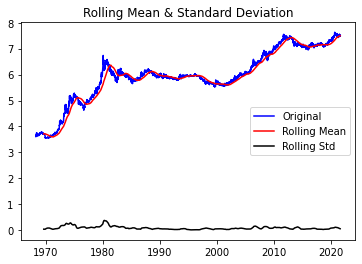

Results of Dickey Fuller Test:
Test Statistic                    -1.636261
p-value                            0.464215
#Lags Used                        41.000000
Number of Observations Used    13866.000000
Critical Value (1%)               -3.430822
Critical Value (5%)               -2.861748
Critical Value (10%)              -2.566881
dtype: float64


In [47]:
test_stationarity(df_logScale)

In [48]:
import stat
df_sqroot = np.sqrt(df_stationary)  # applying the sq-root tranformation

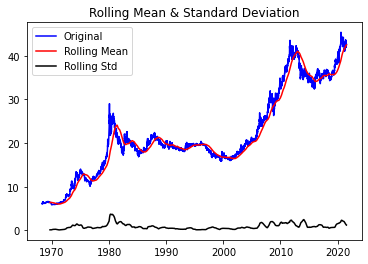

Results of Dickey Fuller Test:
Test Statistic                    -0.161372
p-value                            0.942972
#Lags Used                        41.000000
Number of Observations Used    13866.000000
Critical Value (1%)               -3.430822
Critical Value (5%)               -2.861748
Critical Value (10%)              -2.566881
dtype: float64


In [49]:
test_stationarity(df_sqroot)

In [50]:
## exponentialDecayWeightedAverage
df_expDecayWA = df_stationary.ewm(halflife=365, min_periods=0, adjust=True).mean()

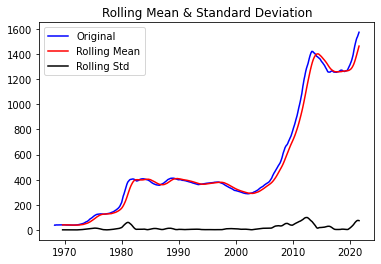

Results of Dickey Fuller Test:
Test Statistic                     0.058353
p-value                            0.963100
#Lags Used                        42.000000
Number of Observations Used    13865.000000
Critical Value (1%)               -3.430822
Critical Value (5%)               -2.861748
Critical Value (10%)              -2.566881
dtype: float64


In [51]:
test_stationarity(df_expDecayWA)

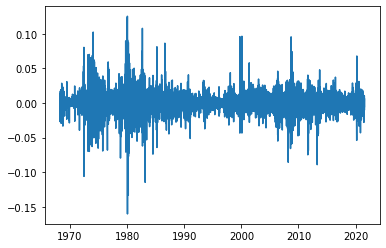

In [52]:
### df_logScale - df_logScale.shift()
df_LogDiffShifting = df_logScale - df_logScale.shift()
plt.plot(df_LogDiffShifting)

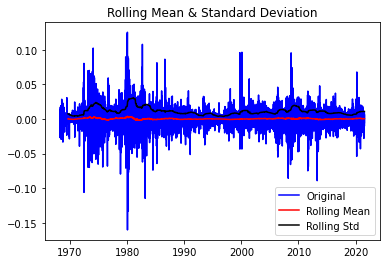

Results of Dickey Fuller Test:
Test Statistic                -1.789854e+01
p-value                        2.959348e-30
#Lags Used                     4.000000e+01
Number of Observations Used    1.386600e+04
Critical Value (1%)           -3.430822e+00
Critical Value (5%)           -2.861748e+00
Critical Value (10%)          -2.566881e+00
dtype: float64


In [53]:
df_LogDiffShifting= df_LogDiffShifting.dropna()
test_stationarity(df_LogDiffShifting)

In [54]:
#The below transformation is required to make series stationary
movingAverage = df_logScale.rolling(window=365).mean()
movingSTD = df_logScale.rolling(window=365).std()

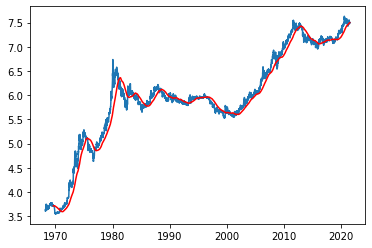

In [55]:
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')

In [56]:
datasetLogScaleMinusMovingAverage = df_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Price
Date,
1969-08-22,0.001043
1969-08-25,-0.000384
1969-08-26,-0.003056
1969-08-27,-0.003279
1969-08-28,-0.002358
1969-08-29,-0.002621
1969-09-01,-0.004849
1969-09-02,-0.007057
1969-09-03,-0.007647


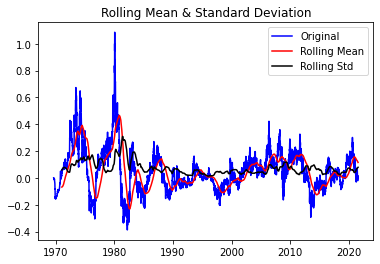

Results of Dickey Fuller Test:
Test Statistic                    -4.793725
p-value                            0.000056
#Lags Used                        41.000000
Number of Observations Used    13502.000000
Critical Value (1%)               -3.430834
Critical Value (5%)               -2.861754
Critical Value (10%)              -2.566884
dtype: float64


In [57]:
test_stationarity(datasetLogScaleMinusMovingAverage)

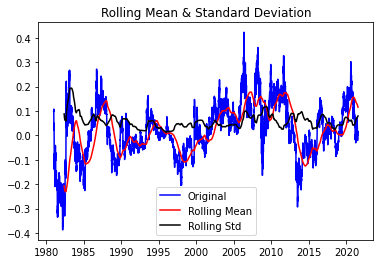

Results of Dickey Fuller Test:
Test Statistic                    -4.768728
p-value                            0.000062
#Lags Used                        11.000000
Number of Observations Used    10568.000000
Critical Value (1%)               -3.430969
Critical Value (5%)               -2.861814
Critical Value (10%)              -2.566916
dtype: float64


In [58]:
test_stationarity(datasetLogScaleMinusMovingAverage.loc['19810101':])

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


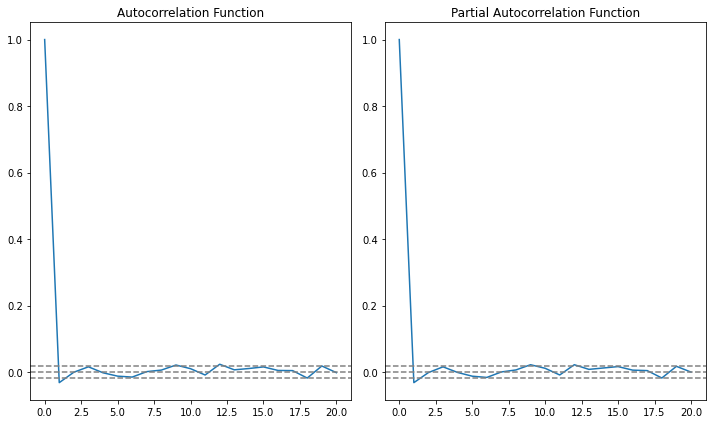

In [59]:
# Plotting ACF & PACF

#ACF & PACF plots

lag_acf = acf(df_LogDiffShifting, nlags=20)
lag_pacf = pacf(df_LogDiffShifting, nlags=20, method='ols')
plt.figure(figsize=(10,6))
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_LogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_LogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_LogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_LogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout() 

In [60]:
# Train and test data split

Train = df_LogDiffShifting.head(round(13544*0.7))
Test = df_LogDiffShifting.tail(round(13544*0.7)-13544)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provide

Plotting AR model


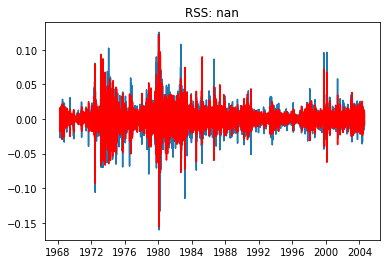

In [61]:
#AR Model
#making order=(2,1,0) gives RSS=2.045
model1 = ARIMA(Train, order=(2,1,0))
results_AR = model1.fit(disp=0)
plt.plot(Train)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - df_LogDiffShifting['Price'])**2))
print('Plotting AR model')


In [62]:
# fit model
model = ARIMA(Train, order=(0,1,3))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]



C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provide

In [63]:
model_fit.fittedvalues

Date
1968-04-03   -5.567303e-08
1968-04-04   -6.904239e-03
1968-04-05    1.615024e-02
1968-04-08   -1.981371e-02
1968-04-09    8.218893e-05
                  ...     
2004-07-28   -1.587495e-03
2004-07-29    1.609033e-02
2004-07-30   -6.937110e-03
2004-08-02   -2.346507e-03
2004-08-03   -9.708504e-03
Length: 9480, dtype: float64

In [64]:
Train.head(10)

,Price
Date,
1968-04-02,-0.010582
1968-04-03,0.002656
1968-04-04,-0.026883
1968-04-05,0.013532
1968-04-08,-0.005391
1968-04-09,0.006734
1968-04-10,0.009352
1968-04-11,0.011897
1968-04-12,0.000438


In [65]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [66]:
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
#warnings.filterwarnings("ignore")
evaluate_models(df_stationary.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [67]:
# 1,1,2 ARIMA Model
model = ARIMA(df_stationary['Price'], order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provide

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                13907
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -49438.952
Method:                       css-mle   S.D. of innovations              8.466
Date:                Fri, 03 Sep 2021   AIC                          98887.904
Time:                        23:20:04   BIC                          98925.605
Sample:                    04-02-1968   HQIC                         98900.459
                         - 07-21-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1271      0.071      1.795      0.073      -0.012       0.266
ar.L1.D.Price    -0.9691      0.021    -45.657      0.000      -1.011      -0.927
ma.L1.D.Price     0.9602      0.023     

In [68]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X#astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [69]:
# Build Model
model = ARIMA(Train, order=(1, 1,2))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(Test.shape[0], alpha=0.05)  # 95% conf

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provide

In [70]:
# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
lower_series = pd.Series(conf[:, 0], index=Test.index)
upper_series = pd.Series(conf[:, 1], index=Test.index)

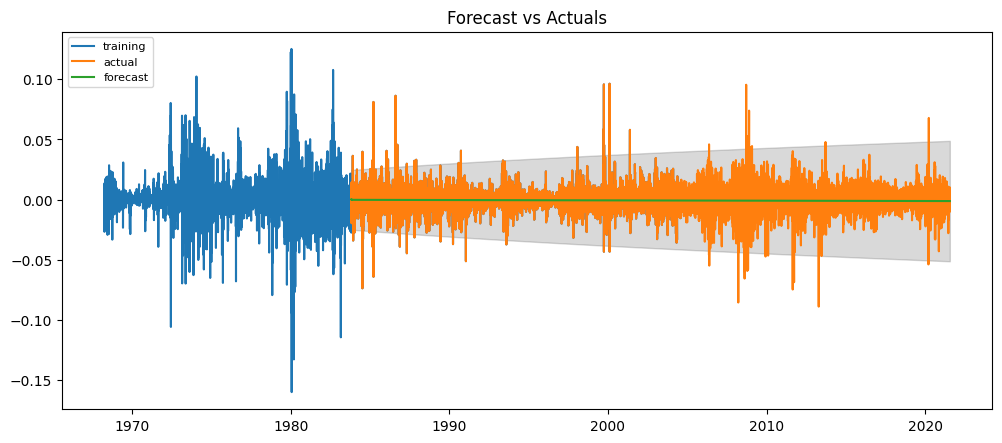

In [71]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train, label='training')
plt.plot(Test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [72]:
train = df_stationary.head(round(13908*0.7))
test = df_stationary.tail(-round(13908*0.7)+13908)

In [73]:
len(train), len(test)

(9736, 4172)

In [74]:
len(test)

4172

In [75]:
# Build Model
model = ARIMA(train, order=(2,2,2))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(test.shape[0], alpha=0.05)  # 95% conf

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provide

In [76]:
se

array([  4.86938692,   6.68024053,   8.08520961, ..., 315.77215631,
       315.81496732, 315.857775  ])

In [77]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

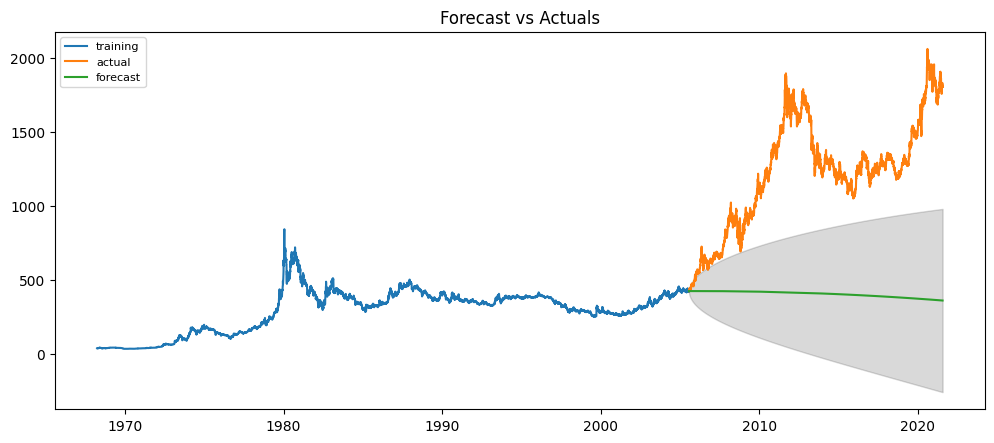

In [78]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [79]:
#evaluate_arima_model(test['Price'],arima_order=(2,2,2))

In [80]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

# neural_network

In [81]:
#neural_network
import xgboost as xgb
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [82]:
model = mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=12,
                           max_iter=100, random_state=5,
                           activation="relu")

In [83]:
def create_lag_feature(df, no_of_days):
    
    for day in range(1, no_of_days+1):
        df[f"lag_{day}"] = df["Price"].shift(day)
        
    return df

In [84]:
df_features = create_lag_feature(df_stationary, 14)

In [85]:
df_features

,Price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,
1968-04-01,38.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968-04-02,37.60,38.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968-04-03,37.70,37.60,38.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968-04-04,36.70,37.70,37.60,38.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968-04-05,37.20,36.70,37.70,37.60,38.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-15,1832.00,1813.05,1807.85,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60,1774.25,1783.25
2021-07-16,1822.00,1832.00,1813.05,1807.85,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60,1774.25
2021-07-19,1803.25,1822.00,1832.00,1813.05,1807.85,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60


In [86]:
df_features = df_features.dropna()

In [87]:
df_features

,Price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,
1968-04-19,37.65,37.60,38.00,38.10,38.083333,38.066667,38.050000,37.600000,37.250000,37.000000,37.20,36.70,37.70,37.60,38.00
1968-04-22,38.30,37.65,37.60,38.00,38.100000,38.083333,38.066667,38.050000,37.600000,37.250000,37.00,37.20,36.70,37.70,37.60
1968-04-23,38.05,38.30,37.65,37.60,38.000000,38.100000,38.083333,38.066667,38.050000,37.600000,37.25,37.00,37.20,36.70,37.70
1968-04-24,38.35,38.05,38.30,37.65,37.600000,38.000000,38.100000,38.083333,38.066667,38.050000,37.60,37.25,37.00,37.20,36.70
1968-04-25,38.25,38.35,38.05,38.30,37.650000,37.600000,38.000000,38.100000,38.083333,38.066667,38.05,37.60,37.25,37.00,37.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-15,1832.00,1813.05,1807.85,1802.95,1803.400000,1810.250000,1804.250000,1807.800000,1790.950000,1783.500000,1774.00,1757.80,1769.60,1774.25,1783.25
2021-07-16,1822.00,1832.00,1813.05,1807.85,1802.950000,1803.400000,1810.250000,1804.250000,1807.800000,1790.950000,1783.50,1774.00,1757.80,1769.60,1774.25
2021-07-19,1803.25,1822.00,1832.00,1813.05,1807.850000,1802.950000,1803.400000,1810.250000,1804.250000,1807.800000,1790.95,1783.50,1774.00,1757.80,1769.60


In [88]:
lag_features =  [ col for col in df_features.columns if "lag" in col]
print(lag_features)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14']


In [89]:
#df_lag_features = df_features[lag_features + ['Standard Gold (22 K)']].dropna()
#df_lag_features.columns
df_features.columns

Index(['Price', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7',
       'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14'],
      dtype='object')

In [90]:
train_lag = df_features.head(round(13894*0.7))
test_lag = df_features.tail(-round(13894*0.7)+13894)

In [91]:
X_train_df = train_lag.drop('Price',axis=1)
X_test_df = test_lag.drop("Price",axis=1)

In [92]:
train_lag

,Price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,
1968-04-19,37.65,37.60,38.00,38.10,38.083333,38.066667,38.050000,37.600000,37.250000,37.000000,37.20,36.70,37.70,37.60,38.00
1968-04-22,38.30,37.65,37.60,38.00,38.100000,38.083333,38.066667,38.050000,37.600000,37.250000,37.00,37.20,36.70,37.70,37.60
1968-04-23,38.05,38.30,37.65,37.60,38.000000,38.100000,38.083333,38.066667,38.050000,37.600000,37.25,37.00,37.20,36.70,37.70
1968-04-24,38.35,38.05,38.30,37.65,37.600000,38.000000,38.100000,38.083333,38.066667,38.050000,37.60,37.25,37.00,37.20,36.70
1968-04-25,38.25,38.35,38.05,38.30,37.650000,37.600000,38.000000,38.100000,38.083333,38.066667,38.05,37.60,37.25,37.00,37.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-07-25,424.85,426.35,423.65,420.65,420.000000,421.600000,419.600000,422.500000,425.550000,426.950000,425.00,423.75,427.85,423.85,426.00
2005-07-26,424.50,424.85,426.35,423.65,420.650000,420.000000,421.600000,419.600000,422.500000,425.550000,426.95,425.00,423.75,427.85,423.85
2005-07-27,422.75,424.50,424.85,426.35,423.650000,420.650000,420.000000,421.600000,419.600000,422.500000,425.55,426.95,425.00,423.75,427.85


In [93]:
test_lag

,Price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,
2005-08-01,431.35,427.15,425.30,422.75,424.50,424.85,426.35,423.65,420.65,420.00,421.60,419.60,422.50,425.55,426.95
2005-08-02,431.85,431.35,427.15,425.30,422.75,424.50,424.85,426.35,423.65,420.65,420.00,421.60,419.60,422.50,425.55
2005-08-03,433.60,431.85,431.35,427.15,425.30,422.75,424.50,424.85,426.35,423.65,420.65,420.00,421.60,419.60,422.50
2005-08-04,435.60,433.60,431.85,431.35,427.15,425.30,422.75,424.50,424.85,426.35,423.65,420.65,420.00,421.60,419.60
2005-08-05,437.50,435.60,433.60,431.85,431.35,427.15,425.30,422.75,424.50,424.85,426.35,423.65,420.65,420.00,421.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-15,1832.00,1813.05,1807.85,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60,1774.25,1783.25
2021-07-16,1822.00,1832.00,1813.05,1807.85,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60,1774.25
2021-07-19,1803.25,1822.00,1832.00,1813.05,1807.85,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60


In [94]:
X_train_df

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,
1968-04-19,37.60,38.00,38.10,38.083333,38.066667,38.050000,37.600000,37.250000,37.000000,37.20,36.70,37.70,37.60,38.00
1968-04-22,37.65,37.60,38.00,38.100000,38.083333,38.066667,38.050000,37.600000,37.250000,37.00,37.20,36.70,37.70,37.60
1968-04-23,38.30,37.65,37.60,38.000000,38.100000,38.083333,38.066667,38.050000,37.600000,37.25,37.00,37.20,36.70,37.70
1968-04-24,38.05,38.30,37.65,37.600000,38.000000,38.100000,38.083333,38.066667,38.050000,37.60,37.25,37.00,37.20,36.70
1968-04-25,38.35,38.05,38.30,37.650000,37.600000,38.000000,38.100000,38.083333,38.066667,38.05,37.60,37.25,37.00,37.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-07-25,426.35,423.65,420.65,420.000000,421.600000,419.600000,422.500000,425.550000,426.950000,425.00,423.75,427.85,423.85,426.00
2005-07-26,424.85,426.35,423.65,420.650000,420.000000,421.600000,419.600000,422.500000,425.550000,426.95,425.00,423.75,427.85,423.85
2005-07-27,424.50,424.85,426.35,423.650000,420.650000,420.000000,421.600000,419.600000,422.500000,425.55,426.95,425.00,423.75,427.85


In [95]:
#Fittig the model

In [97]:
model.fit(X_train_df, train_lag['Price'])

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=12, max_iter=100, random_state=5,
             solver='lbfgs')

In [101]:
predicted_price = model.predict(X_test_df)
test_lag["Gold Predicted_Price"] = predicted_price
test_lag[["Price", "Gold Predicted_Price"]].head()

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Price,Gold Predicted_Price
Date,,
2005-08-01,431.35,425.724083
2005-08-02,431.85,430.604635
2005-08-03,433.60,432.106833
2005-08-04,435.60,434.027720
2005-08-05,437.50,435.252993


In [102]:
test_lag[["Price", "Gold Predicted_Price"]].head()

,Price,Gold Predicted_Price
Date,,
2005-08-01,431.35,425.724083
2005-08-02,431.85,430.604635
2005-08-03,433.60,432.106833
2005-08-04,435.60,434.027720
2005-08-05,437.50,435.252993


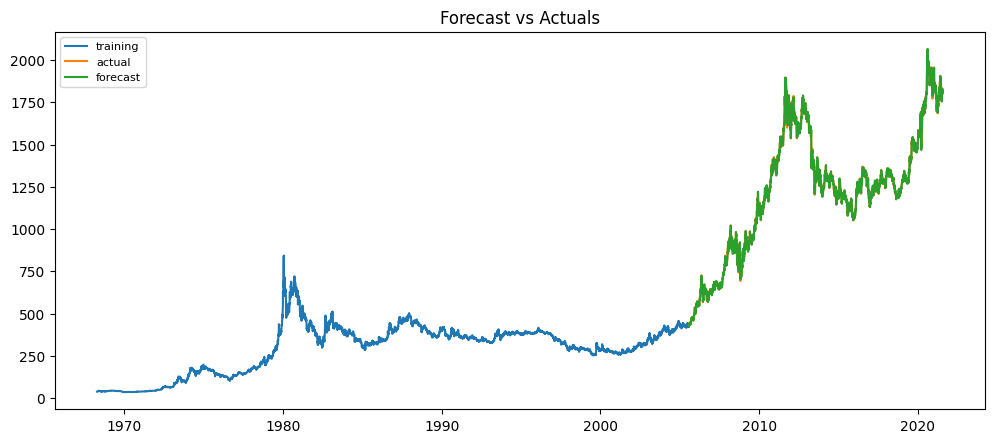

In [103]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_lag['Price'], label='training')
plt.plot(test_lag['Price'], label='actual')
plt.plot(test_lag['Gold Predicted_Price'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [104]:
print(f"RMSE {mean_squared_error(test_lag['Price'], test_lag['Gold Predicted_Price'], squared= False)}")

RMSE 14.34484339177048


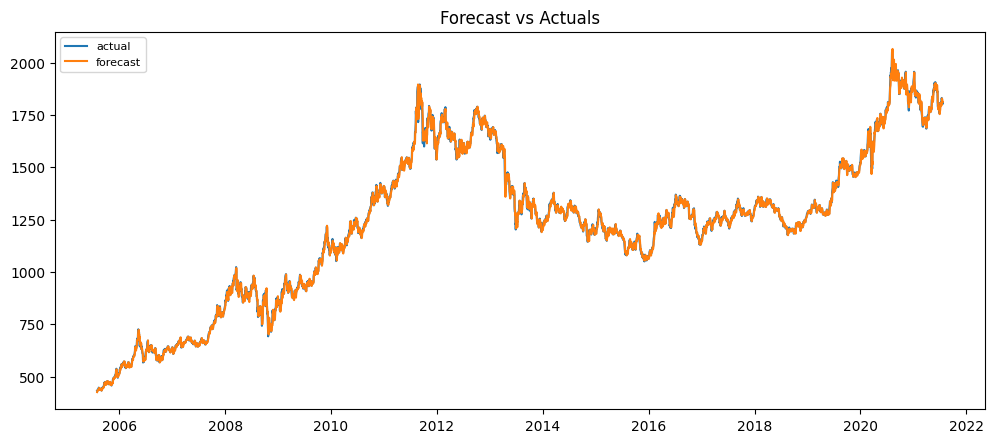

In [105]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test_lag['Price'], label='actual')
plt.plot(test_lag['Gold Predicted_Price'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [164]:
import datetime

def workdays(d, end, excluded=(6, 7)):
    days = []
    while d.date() <= end.date():
        if d.isoweekday() not in excluded:
            days.append(d)
        d += datetime.timedelta(days=1)
    return days



In [165]:
#workdays(datetime.datetime(2021, 9, 1),
 #              datetime.datetime(2021, 9, 30))

[datetime.datetime(2021, 9, 1, 0, 0),
 datetime.datetime(2021, 9, 2, 0, 0),
 datetime.datetime(2021, 9, 3, 0, 0),
 datetime.datetime(2021, 9, 6, 0, 0),
 datetime.datetime(2021, 9, 7, 0, 0),
 datetime.datetime(2021, 9, 8, 0, 0),
 datetime.datetime(2021, 9, 9, 0, 0),
 datetime.datetime(2021, 9, 10, 0, 0),
 datetime.datetime(2021, 9, 13, 0, 0),
 datetime.datetime(2021, 9, 14, 0, 0),
 datetime.datetime(2021, 9, 15, 0, 0),
 datetime.datetime(2021, 9, 16, 0, 0),
 datetime.datetime(2021, 9, 17, 0, 0),
 datetime.datetime(2021, 9, 20, 0, 0),
 datetime.datetime(2021, 9, 21, 0, 0),
 datetime.datetime(2021, 9, 22, 0, 0),
 datetime.datetime(2021, 9, 23, 0, 0),
 datetime.datetime(2021, 9, 24, 0, 0),
 datetime.datetime(2021, 9, 27, 0, 0),
 datetime.datetime(2021, 9, 28, 0, 0),
 datetime.datetime(2021, 9, 29, 0, 0),
 datetime.datetime(2021, 9, 30, 0, 0)]

In [ ]:
#datetime.timedelta(days=1)

In [ ]:
#a=datetime.date(2021,9,1)+datetime.timedelta(days=1)
#=datetime.date(2021, 9, 10)

In [138]:
days =[]
for i in range(10):
    
    excluded=(6, 7)
    a=datetime.date(2021,9,1)+datetime.timedelta(days=i)
    if a.isoweekday() not in excluded:
        days.append(a.isoformat())    

In [120]:
df_features_days =df_features.copy()

In [148]:
#pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
#d=pd.DataFrame({'Date':days})

In [149]:
#d.set_index('Date',inplace=True)

In [153]:
#df_features_days=df_features_days.append(d)#.reindex(days)

In [174]:
#df_features_days.iloc[-9]['Price']

1805.9

In [290]:
df_test =df_stationary.iloc[-50:]

In [301]:
d1=df_test.index[-1]+datetime.timedelta(days=1)

day =[]
for i in range(5):
    
    excluded=(6, 7)
    #a=datetime.date(2021,9,1)+datetime.timedelta(days=i)
    a= df_test.index[-1]+datetime.timedelta(days=i)
    if a.isoweekday() not in excluded:
        day.append(a)

In [302]:
day,d1

([Timestamp('2021-07-21 00:00:00'),
  Timestamp('2021-07-22 00:00:00'),
  Timestamp('2021-07-23 00:00:00')],
 Timestamp('2021-07-22 00:00:00'))

In [303]:
dx=pd.DataFrame({'Date':day})
dx.set_index('Date',inplace=True)
dx

""
Date
2021-07-21
2021-07-22
2021-07-23


In [304]:
df_test=df_test.append(dx)

In [308]:
def create_lag_feature(df, no_of_days):
    
    for day in range(1, no_of_days+1):
        df_test[f"lag_{day}"] = df_test["Price"].shift(day)
        
    return df_test

In [351]:
create_lag_feature(df_test.iloc[-4,-3],14)

,Price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,
2021-05-13,1814.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-14,1833.500000,1814.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-17,1848.450000,1833.500000,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18,1867.400000,1848.450000,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-19,1860.000000,1867.400000,1848.450,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-20,1869.350000,1860.000000,1867.400,1848.450,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-21,1877.650000,1869.350000,1860.000,1867.400,1848.450,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-24,1876.850000,1877.650000,1869.350,1860.000,1867.400,1848.450,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-25,1882.800000,1876.850000,1877.650,1869.350,1860.000,1867.400,1848.450,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
df_test.loc['20210722']['Price']=p[0]
df_test

,Price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,
2021-05-13,1814.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-14,1833.500000,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-17,1848.450000,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18,1867.400000,1848.450,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-19,1860.000000,1867.400,1848.450,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-20,1869.350000,1860.000,1867.400,1848.450,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-21,1877.650000,1869.350,1860.000,1867.400,1848.450,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-24,1876.850000,1877.650,1869.350,1860.000,1867.400,1848.450,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-25,1882.800000,1876.850,1877.650,1869.350,1860.000,1867.400,1848.450,1833.500,1814.300,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
x=df_test.iloc[-4:-3,]
x=x.drop('Price',axis=1)
#x=pd.DataFrame(x)
x

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,
2021-07-21,1815.3,1803.25,1822.0,1832.0,1813.05,1807.85,1802.95,1803.4,1810.25,1804.25,1807.8,1790.95,1783.5,1774.0


In [330]:
p=model.predict(x)
p[0]

1813.462227660262

In [334]:
x['Price']=p

In [335]:
x

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,Price
Date,,,,,,,,,,,,,,,
2021-07-21,1815.3,1803.25,1822.0,1832.0,1813.05,1807.85,1802.95,1803.4,1810.25,1804.25,1807.8,1790.95,1783.5,1774.0,1813.462228


In [477]:
'''def create_lag_feature(df, no_of_days):
    
    for day in range(1, no_of_days+1):
        df[f"lag_{day}"] = df["Price"].shift(day)
        
    return df'''
#df_features_days.index[-8]
#for day in range(1, 15):
#    df_features_days.iloc[13894][f"lag_{day}"] = df_features_days.iloc[13894]["Price"]

df_forcast =df_stationary.iloc[-50:]
def Forcast(df,Days):
    #days=[]
    for i in range(1, Days+1):
        days=[]
        excluded=(6, 7)
         #df.index[-1]+datetime.timedelta(days=i)
        a=df.index[-1]+datetime.timedelta(days=i)
        if a.isoweekday() not in excluded:
            #days.append(a)
            dx=pd.DataFrame({'Date':a})
            dx.set_index('Date',inplace=True)
            df=df.append(dx)
            for day in range(1,15):
                df[f"lag_{day}"] = df["Price"].shift(day)
            #if df.Price.isnull().any():
                #place=df[df.Price.isnull()].index
                xi=df.iloc[-1:,]
                xi=xi.drop("Price",axis=1)
                predict=model.predict(xi)
                df.iloc[-1:,]['Price']=predict[0]
        
            
    return df

In [528]:
df_forcast =df_stationary.iloc[-50:]

In [525]:
df_forcast.tail()

,Price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,
2021-07-15,1832.00,1813.05,1807.85,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60,1774.25,1783.25
2021-07-16,1822.00,1832.00,1813.05,1807.85,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60,1774.25
2021-07-19,1803.25,1822.00,1832.00,1813.05,1807.85,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60
2021-07-20,1815.30,1803.25,1822.00,1832.00,1813.05,1807.85,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80
2021-07-21,1805.90,1815.30,1803.25,1822.00,1832.00,1813.05,1807.85,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00


In [529]:
for i in range(1,10):
    days=[]
    excluded=(6, 7)
         #df.index[-1]+datetime.timedelta(days=i)
    a=df_forcast.index[-1]+datetime.timedelta(days=i)
    if a.isoweekday() not in excluded:
            #days.append(a)
        dx=pd.DataFrame({'Date':a},index=[0])
        dx.set_index('Date',inplace=True)
        df_forcast=df_forcast.append(dx)
        for day in range(1,15):
            df_forcast[f"lag_{day}"] = df_forcast["Price"].shift(day)
            #if df.Price.isnull().any():
                #place=df[df.Price.isnull()].index
        xi=df_forcast.iloc[-1:,]
        xi=xi.drop("Price",axis=1)
        predict=model.predict(xi)
        df_forcast.iloc[-1:,]['Price']=predict[0]

In [533]:
dx

""
Date
2021-08-19


In [531]:
df_forcast.tail(15)

#dfor=df_for[df_for.Price.isnull()].index

,Price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
Date,,,,,,,,,,,,,,,
2021-07-08,1810.250000,1804.250000,1807.800000,1790.950000,1783.500000,1774.00,1757.80,1769.60,1774.25,1783.25,1780.20,1782.90,1779.10,1782.45,1792.35
2021-07-09,1803.400000,1810.250000,1804.250000,1807.800000,1790.950000,1783.50,1774.00,1757.80,1769.60,1774.25,1783.25,1780.20,1782.90,1779.10,1782.45
2021-07-12,1802.950000,1803.400000,1810.250000,1804.250000,1807.800000,1790.95,1783.50,1774.00,1757.80,1769.60,1774.25,1783.25,1780.20,1782.90,1779.10
2021-07-13,1807.850000,1802.950000,1803.400000,1810.250000,1804.250000,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60,1774.25,1783.25,1780.20,1782.90
2021-07-14,1813.050000,1807.850000,1802.950000,1803.400000,1810.250000,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60,1774.25,1783.25,1780.20
2021-07-15,1832.000000,1813.050000,1807.850000,1802.950000,1803.400000,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60,1774.25,1783.25
2021-07-16,1822.000000,1832.000000,1813.050000,1807.850000,1802.950000,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60,1774.25
2021-07-19,1803.250000,1822.000000,1832.000000,1813.050000,1807.850000,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80,1769.60
2021-07-20,1815.300000,1803.250000,1822.000000,1832.000000,1813.050000,1807.85,1802.95,1803.40,1810.25,1804.25,1807.80,1790.95,1783.50,1774.00,1757.80


In [447]:
if df_for.Price.isnull().any():
    print(df_for[df_for.Price.isnull()].index[0])

2021-07-22 00:00:00


In [468]:
import datetime
j=df_for[df_for.Price.isnull()].index[0]

xi=df_for.iloc[-1:,]["Price"]=p[0]
#xi.drop("Price",axis=1)
xi

1813.462227660262

In [461]:
#df_features_days.iloc[-9]["Price"].shift(1)
#df["Price"].shift(-1)
#df_features_days.iloc[13894][f"lag_{day}"]
#df_features_days.iloc[13894]["lag_2"]=

In [349]:
#df_features_days.iloc[13894]

In [350]:
#df_features_days.iloc[13893]['Price'].shift()

# phropet model

In [ ]:
#!pip install fbprophet

In [ ]:
import fbprophe
#from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error

In [ ]:
#phropet model

# print version number
print('Prophet %s' % fbprophet.__version__)